<a href="https://colab.research.google.com/github/AkritiGhosh/KrayenAssessment/blob/main/EDA_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle API Processing to download dataset

In [ ]:
!pip install kaggle
# Create .kaggle folder in ../root directory
!mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Upload kaggle.json => Personal API Token downloaded from kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akritighosh","key":"6338b709da906e0e129e6ff19fe17260"}'}

In [ ]:
# Copy kaggle.json file to created .kaggle folder
!cp kaggle.json ~/.kaggle/
# Change permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

## Download dataset zip 

In [ ]:
!kaggle datasets download manasgarg/ipl

  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 120MB/s]


## Unzip the compressed dataset

In [ ]:
!unzip ipl.zip -d data

Archive:  ipl.zip
  inflating: data/deliveries.csv     
  inflating: data/matches.csv        


In [ ]:
# To create, edit and process dataset from csv files
import pandas as pd
# For mathematical operations and multidimensional arrays
import numpy as np
import math

In [ ]:
deliveries = pd.read_csv('/content/data/deliveries.csv')
matches = pd.read_csv('/content/data/matches.csv')
print(deliveries.info())
print(matches.info())
df_eda = pd.merge(deliveries,matches, left_on='match_id', right_on='id', how ='outer')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [ ]:
df_eda

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [ ]:
del df_eda['id']
del df_eda['umpire3']
del df_eda['result']
del df_eda['fielder']
del matches['umpire3']

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

# Filling empty values

## City

In [ ]:
df_eda.groupby('venue').apply(lambda x: x['city'].unique()[0])

venue
Barabati Stadium                                               Cuttack
Brabourne Stadium                                               Mumbai
Buffalo Park                                               East London
De Beers Diamond Oval                                        Kimberley
Dr DY Patil Sports Academy                                      Mumbai
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      Visakhapatnam
Dubai International Cricket Stadium                                NaN
Eden Gardens                                                   Kolkata
Feroz Shah Kotla                                                 Delhi
Green Park                                                      Kanpur
Himachal Pradesh Cricket Association Stadium                Dharamsala
Holkar Cricket Stadium                                          Indore
JSCA International Stadium Complex                              Ranchi
Kingsmead                                                       Durban


Since values of `city` where `venue` is `Dubai International Cricket Stadium` is null/empty. Fill the empty elements with value - `Dubai`


In [ ]:
df_eda.loc[df_eda['venue'] == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'
matches.loc[matches['venue'] == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'
df_eda.groupby('venue').apply(lambda x: x['city'].unique()[0])

venue
Barabati Stadium                                               Cuttack
Brabourne Stadium                                               Mumbai
Buffalo Park                                               East London
De Beers Diamond Oval                                        Kimberley
Dr DY Patil Sports Academy                                      Mumbai
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      Visakhapatnam
Dubai International Cricket Stadium                              Dubai
Eden Gardens                                                   Kolkata
Feroz Shah Kotla                                                 Delhi
Green Park                                                      Kanpur
Himachal Pradesh Cricket Association Stadium                Dharamsala
Holkar Cricket Stadium                                          Indore
JSCA International Stadium Complex                              Ranchi
Kingsmead                                                       Durban


## Winner
Replacing/filling empty winners as `Tie`



In [ ]:
df_eda['winner'].fillna('Tie', inplace=True)
matches['winner'].fillna('Tie', inplace=True)
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Tie', 'Rising Pune Supergiants'],
      dtype=object)

## Player Dismissed and Dismissal Kind
Replacing NaN with str None

In [ ]:
df_eda['player_dismissed'].fillna('None', inplace=True)
deliveries['player_dismissed'].fillna('None', inplace=True)
df_eda['dismissal_kind'].fillna('None', inplace=True)
deliveries['dismissal_kind'].fillna('None', inplace=True)

## All others

In [ ]:
df_eda = df_eda.fillna('NA')

# EDA

Number of seasons

In [ ]:
seasons = np.sort(matches.season.unique())
seasons

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

Teams

In [ ]:
teams = list(set(matches.team1.unique()) | set(matches.team2.unique()))
teams

['Rising Pune Supergiants',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Delhi Daredevils',
 'Rising Pune Supergiant',
 'Deccan Chargers',
 'Rajasthan Royals',
 'Pune Warriors',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Gujarat Lions',
 'Sunrisers Hyderabad',
 'Chennai Super Kings',
 'Kochi Tuskers Kerala']

## Team Performance

Any team that has not won a single game

In [ ]:
winners = list(matches['winner'].unique())
len(list(set(teams) - set(winners)))

0

Matches won by each team

In [ ]:
total_win = pd.Series(matches['winner'].value_counts(), name = 'Matches Win')
total_win

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Tie                             3
Name: Matches Win, dtype: int64

Matches played by each team

In [ ]:
team_play = {}
for i in teams:
  team_play[i] = int(matches['team1'].value_counts()[i]) + int(matches['team2'].value_counts()[i])
total_play = pd.Series(team_play, name = 'Matches Play')
total_play

Rising Pune Supergiants         14
Kings XI Punjab                148
Mumbai Indians                 157
Delhi Daredevils               147
Rising Pune Supergiant          16
Deccan Chargers                 75
Rajasthan Royals               118
Pune Warriors                   46
Kolkata Knight Riders          148
Royal Challengers Bangalore    152
Gujarat Lions                   30
Sunrisers Hyderabad             76
Chennai Super Kings            131
Kochi Tuskers Kerala            14
Name: Matches Play, dtype: int64

In [ ]:
team_score = pd.merge(total_play, total_win, right_index = True,
               left_index = True)
team_score['Win%'] = (team_score['Matches Win'] / team_score['Matches Play']) * 100
team_score.sort_values('Win%', ascending=False)

,Matches Play,Matches Win,Win%
Rising Pune Supergiant,16,10,62.500000
Chennai Super Kings,131,79,60.305344
Mumbai Indians,157,92,58.598726
Sunrisers Hyderabad,76,42,55.263158
Rajasthan Royals,118,63,53.389831
Kolkata Knight Riders,148,77,52.027027
Royal Challengers Bangalore,152,73,48.026316
Kings XI Punjab,148,70,47.297297
Gujarat Lions,30,13,43.333333
Kochi Tuskers Kerala,14,6,42.857143


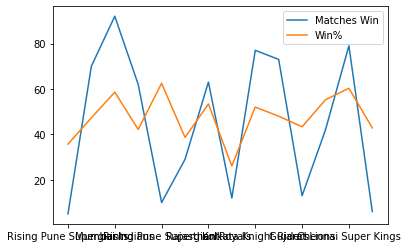

In [ ]:
team_score[['Matches Win','Win%']].plot()

## Performance Per Season

Winners per season

In [ ]:
season_winners = []
for i in seasons:
  print('Season - ', i)
  # Season Winner =  Winner of last/final match of the season
  print('Season winner - ', matches[matches['season']==i].iloc[-1,:].winner) 
  season_winners.append(matches[matches['season']==i].iloc[-1,:].winner)
  # Total number of matches = no/count of ids
  print('Total number of matches - ', matches[matches['season']==i]['id'].count())
  print('Matches won - ')
  print(matches[matches['season']==i]['winner'].value_counts())
  print()

Season -  2008
Season winner -  Rajasthan Royals
Total number of matches -  58
Matches won - 
Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
Name: winner, dtype: int64

Season -  2009
Season winner -  Deccan Chargers
Total number of matches -  57
Matches won - 
Delhi Daredevils               10
Royal Challengers Bangalore     9
Deccan Chargers                 9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: winner, dtype: int64

Season -  2010
Season winner -  Chennai Super Kings
Total number of matches -  60
Matches won - 
Mumbai Indians                 11
Chennai Super Kings             9
Deccan Chargers                 8
Royal Challeng

## Dismissal

In [ ]:
dms_player = df_eda[df_eda['player_dismissed'] != 'None'][['player_dismissed','dismissal_kind']].value_counts().to_frame().reset_index()
dms_player['count'] = dms_player[0]
del dms_player[0]
dms_player

,player_dismissed,dismissal_kind,count
0,SK Raina,caught,94
1,RV Uthappa,caught,87
2,RG Sharma,caught,83
3,G Gambhir,caught,77
4,V Kohli,caught,76
...,...,...,...
1362,RE Levi,caught,1
1363,KS Williamson,lbw,1
1364,KS Williamson,run out,1
1365,RA Tripathi,lbw,1


Now we can access different informations. 
For example

1.  To see the frequency of different kinds of dismissals for a particular player - V Kohli

In [ ]:
player_name = 'V Kohli'
dms_player[dms_player['player_dismissed'] == player_name]

,player_dismissed,dismissal_kind,count
4,V Kohli,caught,76
55,V Kohli,bowled,24
248,V Kohli,lbw,7
282,V Kohli,run out,6
473,V Kohli,stumped,3
699,V Kohli,caught and bowled,2


As per the above table, V Kohli is dismissed/outed mostly because of caught/catch out


---



2.  Which player has been dismissed the most because of a particular kind of dismissal - LBW

In [ ]:
out_kind = 'lbw'
dms_player[dms_player['dismissal_kind'] == out_kind]

,player_dismissed,dismissal_kind,count
98,BB McCullum,lbw,16
136,RV Uthappa,lbw,12
139,DR Smith,lbw,12
164,KD Karthik,lbw,10
186,M Vijay,lbw,9
...,...,...,...
1346,CM Gautam,lbw,1
1351,RJ Harris,lbw,1
1356,AS Raut,lbw,1
1363,KS Williamson,lbw,1


As per the above table, BB McCullum is dismissed/outed mostly because of LBW


---



## Toss decision

1. Does winning the toss affect chances of winning in general

In [ ]:
print("Toss winners won the game - ", matches[matches['toss_winner']== matches['winner']].shape[0])
print("Toss winners lost the game - ", matches[matches['toss_winner'] != matches['winner']].shape[0])

Toss winners won the game -  325
Toss winners lost the game -  311


2. Choosing to field or bat affect the winning

In [ ]:
print('Number of times teams won chosing to bat first -', matches[(matches['toss_winner']== matches['winner']) & (matches['toss_decision']== 'bat')].shape[0])
print('Number of times teams won chosing to field first -', matches[(matches['toss_winner']== matches['winner']) & (matches['toss_decision']== 'field')].shape[0])

Number of times teams won chosing to bat first - 124
Number of times teams won chosing to field first - 201


## Bowlers

In [ ]:
bowlers = deliveries[['match_id','over','bowler']].drop_duplicates()
bowlers

,match_id,over,bowler
0,1,1,TS Mills
7,1,2,A Choudhary
14,1,3,TS Mills
20,1,4,YS Chahal
26,1,5,S Aravind
...,...,...,...
150430,636,16,BCJ Cutting
150436,636,17,Mustafizur Rahman
150442,636,18,B Kumar
150448,636,19,Mustafizur Rahman


1. Which bowler had the most number of outs/dismissal

In [ ]:
df_eda[df_eda['player_dismissed'] != 'None'][['bowler']].value_counts().to_frame().reset_index()

,bowler,0
0,SL Malinga,170
1,A Mishra,142
2,DJ Bravo,137
3,Harbhajan Singh,136
4,PP Chawla,133
...,...,...
309,Swapnil Singh,1
310,T Henderson,1
311,NB Singh,1
312,Mashrafe Mortaza,1


## Deliveries


['wide_runs','bye_runs','legbye_runs','noball_runs', 'penalty_runs', 'batsman_runs','extra_runs']

1. Which bowler has highest number of wide balls and in which season

In [ ]:
df_eda.groupby(['season','bowler'])['wide_runs'].sum().reset_index().sort_values('wide_runs', ascending=False).iloc[0,:]

season              2008
bowler       S Sreesanth
wide_runs             30
Name: 68, dtype: object

2. Which batsman has highest number of runs in all seasons

In [ ]:
deliveries.groupby(['batsman'])['total_runs'].sum().reset_index().sort_values('total_runs', ascending=False).iloc[0,:]

batsman       SK Raina
total_runs        4745
Name: 374, dtype: object

3. How many runs by a player(batsman) in a season were batsman runs

In [ ]:
bat_total = df_eda.groupby(['season','batsman'])[['batsman_runs','total_runs']].sum().reset_index()
bat_total['bat_runs_percent'] = bat_total['batsman_runs']/bat_total['total_runs']
bat_total

,season,batsman,batsman_runs,total_runs,bat_runs_percent
0,2008,A Chopra,42,45,0.933333
1,2008,A Kumble,13,17,0.764706
2,2008,A Mishra,37,37,1.000000
3,2008,A Mukund,0,0,NaN
4,2008,A Nehra,3,5,0.600000
...,...,...,...,...,...
1526,2017,Washington Sundar,9,12,0.750000
1527,2017,YK Pathan,143,155,0.922581
1528,2017,YS Chahal,13,13,1.000000
1529,2017,Yuvraj Singh,252,265,0.950943


4. Which batsman has highest number of runs in per seasons, and in what season

In [ ]:
df_eda.groupby(['season','batsman'])['total_runs'].sum().reset_index().sort_values('total_runs', ascending=False).iloc[0,:]

season           2016
batsman       V Kohli
total_runs        998
Name: 1383, dtype: object

5. In which match, the highest number of runs were scored in an over. Mention the teams, batsman, inning etc

In [ ]:
highest_run_over = deliveries.groupby(['match_id','inning','over','batsman'])['total_runs'].sum().reset_index().sort_values('total_runs', ascending=False).iloc[0,:]
highest_run_over # Info about the score

match_id           283
inning               2
over                 3
batsman       CH Gayle
total_runs          37
Name: 22913, dtype: object

In [ ]:
# Info about the match
matchID = highest_run_over.iloc[0]
matches[(matches['id']==matchID)][['season','venue','team1','team2']]

,season,venue,team1,team2
282,2011,M Chinnaswamy Stadium,Kochi Tuskers Kerala,Royal Challengers Bangalore


# Winner Prediction

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
train = df_eda.groupby(['season','city','venue','match_id','toss_winner','winner','inning','batting_team','bowling_team','over','batsman','bowler'])['total_runs','wide_runs','bye_runs','legbye_runs',
'noball_runs', 'penalty_runs', 'batsman_runs','extra_runs'].agg(['sum']).reset_index()
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,season,city,venue,match_id,toss_winner,winner,inning,batting_team,bowling_team,over,batsman,bowler,total_runs,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs
,,,,,,,,,,,,,sum,sum,sum,sum,sum,sum,sum,sum
0,2008,Bangalore,M Chinnaswamy Stadium,60,Royal Challengers Bangalore,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,BB McCullum,P Kumar,2,1,0,1,0,0,0,2
1,2008,Bangalore,M Chinnaswamy Stadium,60,Royal Challengers Bangalore,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,SC Ganguly,P Kumar,1,0,0,1,0,0,0,1
2,2008,Bangalore,M Chinnaswamy Stadium,60,Royal Challengers Bangalore,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,BB McCullum,Z Khan,18,0,0,0,0,0,18,0
3,2008,Bangalore,M Chinnaswamy Stadium,60,Royal Challengers Bangalore,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,BB McCullum,P Kumar,5,0,0,0,0,0,5,0
4,2008,Bangalore,M Chinnaswamy Stadium,60,Royal Challengers Bangalore,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,SC Ganguly,P Kumar,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51538,2017,Rajkot,Saurashtra Cricket Association Stadium,34,Gujarat Lions,Mumbai Indians,2,Mumbai Indians,Gujarat Lions,20,SL Malinga,IK Pathan,0,0,0,0,0,0,0,0
51539,2017,Rajkot,Saurashtra Cricket Association Stadium,34,Gujarat Lions,Mumbai Indians,3,Mumbai Indians,Gujarat Lions,1,JC Buttler,JP Faulkner,1,0,0,0,0,0,1,0
51540,2017,Rajkot,Saurashtra Cricket Association Stadium,34,Gujarat Lions,Mumbai Indians,3,Mumbai Indians,Gujarat Lions,1,KA Pollard,JP Faulkner,10,0,0,0,0,0,10,0


In [ ]:
enc = {}
for col in train.columns:
  enc[col] = LabelEncoder()
  if train[col].dtypes != np.int64 or train[col].dtypes != np.float64:
    train[col] = enc[col].fit_transform(train[col])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51543 entries, 0 to 51542
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   (season, )           51543 non-null  int64
 1   (city, )             51543 non-null  int64
 2   (venue, )            51543 non-null  int64
 3   (match_id, )         51543 non-null  int64
 4   (toss_winner, )      51543 non-null  int64
 5   (winner, )           51543 non-null  int64
 6   (inning, )           51543 non-null  int64
 7   (batting_team, )     51543 non-null  int64
 8   (bowling_team, )     51543 non-null  int64
 9   (over, )             51543 non-null  int64
 10  (batsman, )          51543 non-null  int64
 11  (bowler, )           51543 non-null  int64
 12  (total_runs, sum)    51543 non-null  int64
 13  (wide_runs, sum)     51543 non-null  int64
 14  (bye_runs, sum)      51543 non-null  int64
 15  (legbye_runs, sum)   51543 non-null  int64
 16  (noball_runs, sum)   5

In [ ]:
df_train = train.loc[:, train.columns != 'winner']
df_train = df_train.loc[:, train.columns != 'match_id']
X_train, X_test, Y_train, Y_test = train_test_split(df_train, train['winner'],test_size=0.25,random_state = 64)

In [ ]:
df_train

,season,city,venue,match_id,toss_winner,winner,inning,batting_team,bowling_team,over,batsman,bowler,total_runs,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs
,,,,,,,,,,,,,sum,sum,sum,sum,sum,sum,sum,sum
0,0,2,14,59,12,6,0,6,12,0,66,218,2,1,0,1,0,0,0,2
1,0,2,14,59,12,6,0,6,12,0,369,218,1,0,0,1,0,0,0,1
2,0,2,14,59,12,6,0,6,12,1,66,355,18,0,0,0,0,0,18,0
3,0,2,14,59,12,6,0,6,12,2,66,218,5,0,0,0,0,0,5,0
4,0,2,14,59,12,6,0,6,12,2,369,218,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51538,9,27,25,33,3,7,1,7,3,19,377,123,0,0,0,0,0,0,0,0
51539,9,27,25,33,3,7,2,7,3,0,169,144,1,0,0,0,0,0,1,0
51540,9,27,25,33,3,7,2,7,3,0,190,144,10,0,0,0,0,0,10,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       1.00      1.00      1.00       599
           2       1.00      1.00      1.00      1231
           3       1.00      1.00      1.00       257
           4       1.00      1.00      1.00      1399
           5       1.00      1.00      1.00       118
           6       1.00      1.00      1.00      1566
           7       1.00      1.00      1.00      1934
           8       1.00      1.00      1.00       234
           9       1.00      1.00      1.00      1272
          10       1.00      1.00      1.00       206
          11       1.00      1.00      1.00        90
          12       1.00      1.00      1.00      1490
          13       1.00      1.00      1.00       833
          14       1.00      1.00      1.00        28

    accuracy                           1.00     12886
   macro avg       1.00      1.00      1.00     12886
weighted avg       1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


1.0
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3

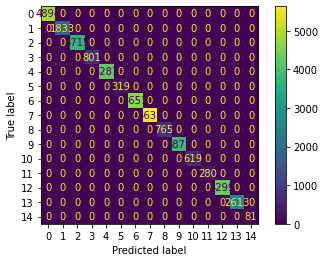

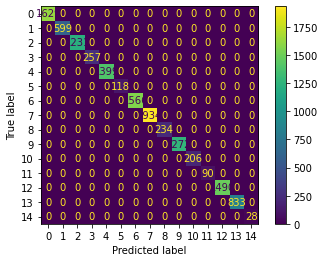

In [ ]:
rf = RandomForestClassifier(random_state=64)
rf.fit(X_train, Y_train)
rfd_pred = rf.predict(X_test)
print(classification_report(Y_test,rfd_pred))
print(accuracy_score(Y_train,rf.predict(X_train)))
print(accuracy_score(Y_test,rfd_pred))
plot_confusion_matrix(rf, X_train, Y_train)
plot_confusion_matrix(rf, X_test, Y_test)

In [ ]:
import joblib
joblib.dump(rf, "./rf_ipl.joblib")
files.download('/content/rf_ipl.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>